In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [4]:
kag = pd.read_csv("KAG_conversion_data.csv")

In [5]:
kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
kag.count()

ad_id                  1143
xyz_campaign_id        1143
fb_campaign_id         1143
age                    1143
gender                 1143
interest               1143
Impressions            1143
Clicks                 1143
Spent                  1143
Total_Conversion       1143
Approved_Conversion    1143
dtype: int64

In [7]:
kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [8]:
kag.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [9]:
#check for null values

kag.isnull().sum() # here there are no null values

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

# Exploratory Data Analysis

In [10]:
print("Number of Companies for campaign : ",len(kag['xyz_campaign_id'].unique()))
print("Male to Female ratio : ", len(kag[kag['gender']=='M'])/len(kag[kag['gender']=='F']))

Number of Companies for campaign :  3
Male to Female ratio :  1.074410163339383


In [11]:
# Clicks to Impression ratio

kag['clickToImpPer']=(kag['Clicks']/kag['Impressions'])*100
kag

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


In [12]:
kag['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [13]:
# Grouping the data based on Age and Gender

kag2 = kag.groupby(['age','gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()
kag2['clickToImpPer']=kag2['Clicks']/kag2['Impressions']
kag2

,age,gender,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,30-34,F,31.878173,160261.807107,38.636954,3.142132,25.883249,0.000162
1,30-34,M,29.912664,159045.602620,33.366463,3.545852,19.144105,0.000120
2,35-39,F,36.431193,196692.706422,55.608716,2.788991,38.174312,0.000194
3,35-39,M,31.863309,148670.064748,36.338705,2.316547,21.100719,0.000142
4,40-44,F,36.000000,218655.841121,69.126916,3.009346,48.383178,0.000221
5,40-44,M,32.796117,157360.504854,40.710194,1.951456,24.844660,0.000158
6,45-49,F,33.898551,278663.702899,97.342101,2.891304,68.413043,0.000246
7,45-49,M,33.173554,208903.033058,60.474876,2.355372,36.454545,0.000175


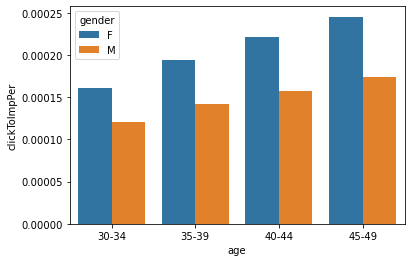

In [14]:
# Plot for Click to Impression vs Age

sns.barplot(x=kag2.age,y=kag2.clickToImpPer,hue=kag2.gender)
plt.show()

#Users in age group 45-49 have higher Click to Impression ratio 
#and females of each age group have higher Click to Impression ratio than their male counterparts

Text(0.5, 0, 'Interest')

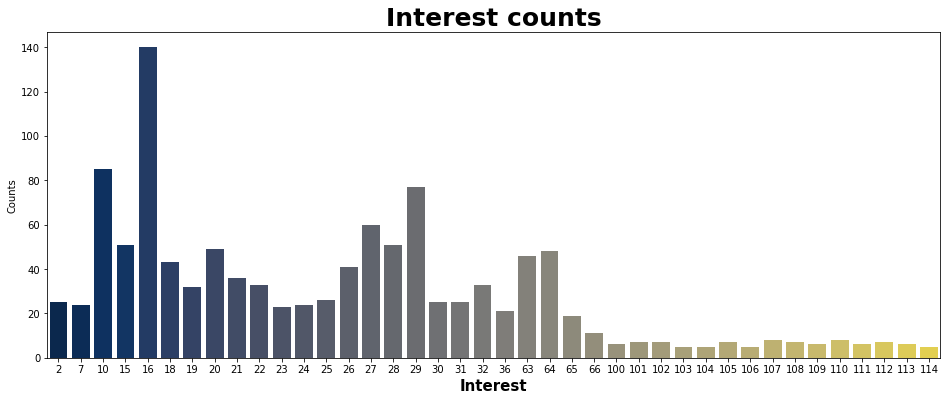

In [15]:
plt.figure(figsize = (16,6))
interest_count = sns.countplot(data = kag, x = 'interest', palette='cividis')
interest_count.set_title("Interest counts", fontsize = 25, weight = 1000)
interest_count.set_ylabel('Counts')
interest_count.set_xlabel("Interest", fontsize = 15, weight = 1000)

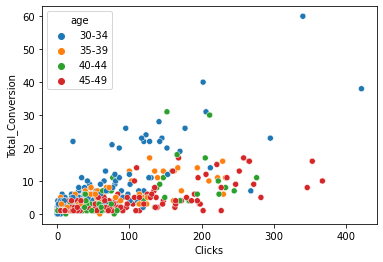

In [16]:
# Scatterplot showing Total Conversions vs Clicks for each age group

sns.scatterplot(x = kag['Clicks'], y = kag['Total_Conversion'], hue=kag["age"])
plt.show()

In [17]:
# Overall Stats for each age group

kag.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,age,interest,Impressions,Spent,Total_Conversion,Clicks
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625


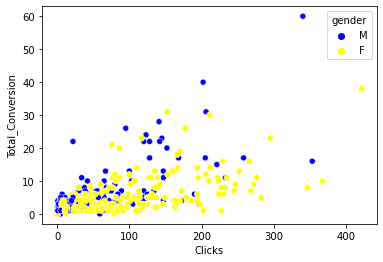

In [18]:
# Plot Total Conversions vs Clicks for each gender 

sns.scatterplot(x = kag['Clicks'], y = kag['Total_Conversion'], hue=kag["gender"], palette = ['blue','yellow'])
plt.show()

In [19]:
# Overall Stats for each gender

kag.groupby(['gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,gender,interest,Impressions,Spent,Total_Conversion,Clicks
0,F,34.085299,208462.517241,62.618185,2.983666,43.335753
1,M,31.538851,166506.724662,40.882787,2.736486,24.133446


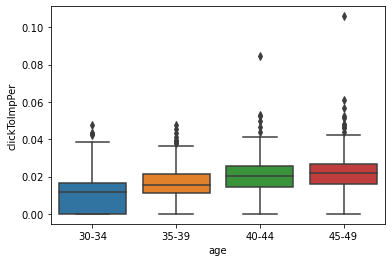

In [20]:
'''Finding the perfect target demographics 
with the appropriate clickthrough rates. (Clickthrough rate: ClickToImpPer = Clicks/Impression)'''

# Box plot for Click to Impression ratio vs Age

sns.boxplot(x = kag['age'], y = kag['clickToImpPer'])
plt.show()

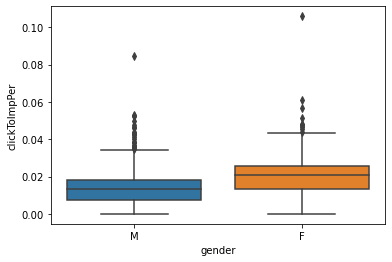

In [21]:
# Box plot for Click to Impression ratio vs Gender

sns.boxplot(x = kag['gender'], y = kag['clickToImpPer'])
plt.show()

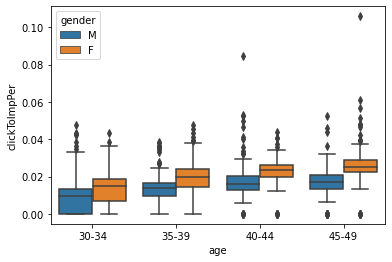

In [22]:
# Box plot for Click to Impression ratio vs Age for each gender

sns.boxplot(x = kag['age'], y = kag['clickToImpPer'], hue=kag["gender"])
plt.show()

In [23]:
# Group the data based on age groups

kag3 = kag.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
kag3['clickToImpPer']=kag3['Clicks']/kag3['Impressions']
kag3

,age,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563,1.159624,0.000139
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839,0.834677,0.000168
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095,0.809524,0.000195
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625,0.803089,0.000217


Conclusion:
The target group of people with higher clickthrough rates are:
* Females in age group 45-49
* Females in age group 40-44

In [24]:
group_by_xyz_campaign_id = kag.groupby('xyz_campaign_id').sum().drop(['ad_id', 'fb_campaign_id', 'interest'], axis = 1)

In [25]:
group_by_xyz_campaign_id.reset_index(inplace=True)
group_by_xyz_campaign_id['Campaign_alias'] = ['Campaign A (916)', 'Campaign B (936)', 'Campaign C (1178)']
group_by_xyz_campaign_id

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer,Campaign_alias
0,916,482925,113,149.710001,58,24,0.972795,Campaign A (916)
1,936,8128187,1984,2893.369999,537,183,7.656697,Campaign B (936)
2,1178,204823716,36068,55662.149959,2669,872,10.138193,Campaign C (1178)


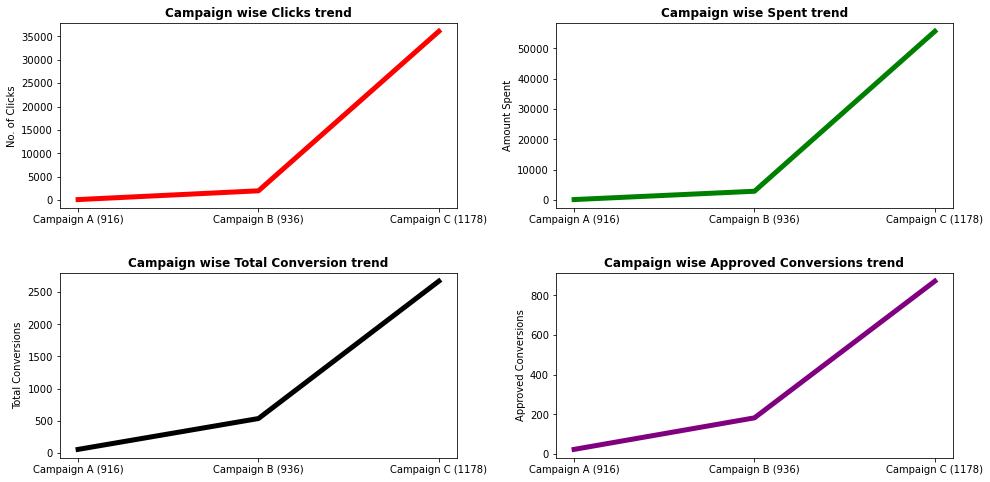

In [26]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,8))


axes[0][0].plot(group_by_xyz_campaign_id['Campaign_alias'], group_by_xyz_campaign_id['Clicks'], 
                color = 'Red', lw = 5)
axes[0][0].set_title('Campaign wise Clicks trend', fontweight = 1000)
axes[0][0].set_ylabel('No. of Clicks')


axes[0][1].plot(group_by_xyz_campaign_id['Campaign_alias'], group_by_xyz_campaign_id['Spent'], 
                color = 'Green', lw = 5)
axes[0][1].set_title('Campaign wise Spent trend', fontweight = 1000)
axes[0][1].set_ylabel('Amount Spent')

axes[1][0].plot(group_by_xyz_campaign_id['Campaign_alias'], group_by_xyz_campaign_id['Total_Conversion'], 
                color = 'Black', lw = 5)
axes[1][0].set_title('Campaign wise Total Conversion trend', fontweight = 1000)
axes[1][0].set_ylabel("Total Conversions")

axes[1][1].plot(group_by_xyz_campaign_id['Campaign_alias'], group_by_xyz_campaign_id['Approved_Conversion'],
               color = 'Purple', lw = 5)
axes[1][1].set_title("Campaign wise Approved Conversions trend", fontweight = 1000)
axes[1][1].set_ylabel('Approved Conversions')

fig.subplots_adjust(wspace=0.25, hspace=0.35,)

In [27]:
x = kag.drop('Approved_Conversion', axis =1 )
y = kag['Approved_Conversion']

In [28]:
x.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,0.024195


In [29]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Approved_Conversion, dtype: int64

In [35]:
kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


## Model Development

### Gaussian Naive Bayes 

In [36]:
x = kag[['interest', 'Impressions']]
x

,interest,Impressions
0,15,7350
1,16,17861
2,20,693
3,28,4259
4,28,4133
...,...,...
1138,109,1129773
1139,110,637549
1140,111,151531
1141,113,790253


In [37]:
y = kag[['Total_Conversion']]
y

,Total_Conversion
0,2
1,2
2,1
3,1
4,1
...,...
1138,13
1139,3
1140,2
1141,8


In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()

In [40]:
GNB_classifier.fit(x, y)
predicted = GNB_classifier.predict(x)

C:\Users\Harishini\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Accuracy of the Algorithm:  0.6194225721784777


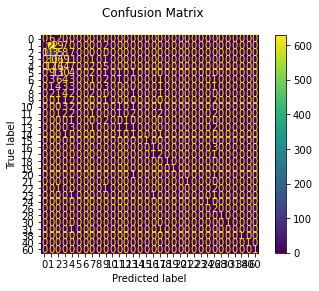

In [41]:
disp = metrics.plot_confusion_matrix(GNB_classifier, x, y)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(x, y))

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear = LinearRegression()

In [44]:
linear.fit(x,y)

LinearRegression()

In [45]:
linear.intercept_

array([0.48417151])

In [46]:
linear.coef_

array([[6.28398179e-03, 1.15971901e-05]])

In [47]:
linear.predict([[45, 13]])

array([[0.76710146]])

In [48]:
linear.score(x, y)

0.6621170641289177

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# KNN_classifier.fit(x_train, y_train)
# predicted = KNN_classifier.predict(x_test)

# disp = metrics.plot_confusion_matrix(KNN_classifier, x_test, y_test)
# disp.figure_.suptitle("Confusion Matrix")
# print("\nAccuracy of the Algorithm: ", KNN_classifier.score(x_test, y_test))

In [50]:
KNN_classifier.fit(x, y)
predicted = KNN_classifier.predict(x)

C:\Users\Harishini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(x, y))


Accuracy of the Algorithm:  0.6727909011373578


### SVM 

In [52]:
from sklearn import svm

svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(x, y)

C:\Users\Harishini\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma=0.001)


Accuracy of the Algorithm:  0.9711286089238845


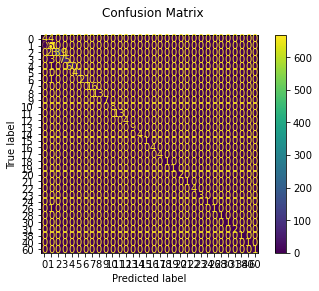

In [53]:
predicted = svm_classifier.predict(x)


disp = metrics.plot_confusion_matrix(svm_classifier, x, y)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", svm_classifier.score(x, y))

## Prediction

In [57]:
def conversion(ad_id, xyz_campaign_id,fb_campaign_id , interest, Impressions, Clicks, Spent, Total_Conversion):
    x = np.array([ad_id, xyz_campaign_id,fb_campaign_id , interest, Impressions, Clicks, Spent, Total_Conversion])
    prediction = model.predict(x.reshape(1, -1))
    
    return prediction

In [58]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=conversion, inputs=['number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a Ad conversion model")

C:\Users\Harishini\anaconda3\lib\site-packages\gradio\outputs.py:21: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


IMPORTANT: You are using gradio version 3.12.0, however version 3.14.0 is available, please upgrade.
--------


In [62]:
app.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
